In [1]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
train=pd.read_csv('C:\\Users\\ASHISH GUSAIN\\Documents\\datasets\\loan prediction\\train.csv')

In [3]:
test=pd.read_csv('C:\\Users\\ASHISH GUSAIN\\Documents\\datasets\\loan prediction\\test.csv')

In [4]:
train['indicator']="train"
test['indicator']="test"

In [5]:
data=pd.concat([train,test])

In [6]:
data.head(10)

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed,indicator
0,5849,0.0,1.0,0,Graduate,Male,NaN,360.0,LP001002,Y,No,Urban,No,train
1,4583,1508.0,1.0,1,Graduate,Male,128.0,360.0,LP001003,N,Yes,Rural,No,train
2,3000,0.0,1.0,0,Graduate,Male,66.0,360.0,LP001005,Y,Yes,Urban,Yes,train
3,2583,2358.0,1.0,0,Not Graduate,Male,120.0,360.0,LP001006,Y,Yes,Urban,No,train
4,6000,0.0,1.0,0,Graduate,Male,141.0,360.0,LP001008,Y,No,Urban,No,train
5,5417,4196.0,1.0,2,Graduate,Male,267.0,360.0,LP001011,Y,Yes,Urban,Yes,train
6,2333,1516.0,1.0,0,Not Graduate,Male,95.0,360.0,LP001013,Y,Yes,Urban,No,train
7,3036,2504.0,0.0,3+,Graduate,Male,158.0,360.0,LP001014,N,Yes,Semiurban,No,train
8,4006,1526.0,1.0,2,Graduate,Male,168.0,360.0,LP001018,Y,Yes,Urban,No,train
9,12841,10968.0,1.0,1,Graduate,Male,349.0,360.0,LP001020,N,Yes,Semiurban,No,train


In [8]:
data.dtypes

ApplicantIncome        int64
CoapplicantIncome    float64
Credit_History       float64
Dependents            object
Education             object
Gender                object
LoanAmount           float64
Loan_Amount_Term     float64
Loan_ID               object
Loan_Status           object
Married               object
Property_Area         object
Self_Employed         object
indicator             object
dtype: object

In [9]:
print(data.shape,test.shape,train.shape)

(981, 14) (367, 13) (614, 14)


In [10]:
data.isnull().sum()

ApplicantIncome        0
CoapplicantIncome      0
Credit_History        79
Dependents            25
Education              0
Gender                24
LoanAmount            27
Loan_Amount_Term      20
Loan_ID                0
Loan_Status          367
Married                3
Property_Area          0
Self_Employed         55
indicator              0
dtype: int64

In [11]:
data.describe()

,ApplicantIncome,CoapplicantIncome,Credit_History,LoanAmount,Loan_Amount_Term
count,981.000000,981.000000,902.000000,954.000000,961.000000
mean,5179.795107,1601.916330,0.835920,142.511530,342.201873
std,5695.104533,2718.772806,0.370553,77.421743,65.100602
min,0.000000,0.000000,0.000000,9.000000,6.000000
25%,2875.000000,0.000000,1.000000,100.000000,360.000000
50%,3800.000000,1110.000000,1.000000,126.000000,360.000000
75%,5516.000000,2365.000000,1.000000,162.000000,360.000000
max,81000.000000,41667.000000,1.000000,700.000000,480.000000


In [12]:
data.apply(lambda x:len(x.unique()))

ApplicantIncome      752
CoapplicantIncome    437
Credit_History         3
Dependents             5
Education              2
Gender                 3
LoanAmount           233
Loan_Amount_Term      13
Loan_ID              981
Loan_Status            3
Married                3
Property_Area          3
Self_Employed          3
indicator              2
dtype: int64

In [13]:
#Filter categorical variables
categorical_columns = [x for x in data.dtypes.index if data.dtypes[x]=='object']
#Exclude ID cols and source:
categorical_columns = [x for x in categorical_columns if x not in ['Loan_ID','indicator']]
#Print frequency of categories
for col in categorical_columns:
    print ('\nFrequency of Categories for varible %s'%col)
    print (data[col].value_counts())


Frequency of Categories for varible Dependents
0     545
2     160
1     160
3+     91
Name: Dependents, dtype: int64

Frequency of Categories for varible Education
Graduate        763
Not Graduate    218
Name: Education, dtype: int64

Frequency of Categories for varible Gender
Male      775
Female    182
Name: Gender, dtype: int64

Frequency of Categories for varible Loan_Status
Y    422
N    192
Name: Loan_Status, dtype: int64

Frequency of Categories for varible Married
Yes    631
No     347
Name: Married, dtype: int64

Frequency of Categories for varible Property_Area
Semiurban    349
Urban        342
Rural        290
Name: Property_Area, dtype: int64

Frequency of Categories for varible Self_Employed
No     807
Yes    119
Name: Self_Employed, dtype: int64


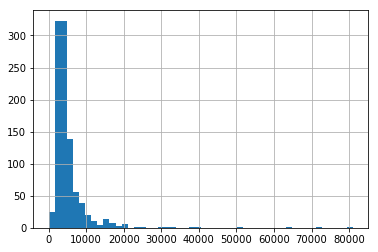

In [14]:
#univariate-numerical
data.ApplicantIncome.hist(bins=50)


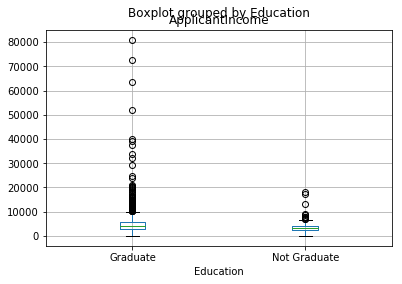

In [15]:
data.boxplot(column='ApplicantIncome',by='Education')

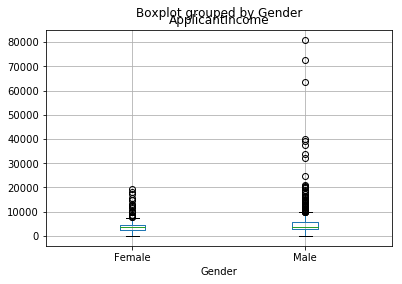

In [16]:
data.boxplot(column='ApplicantIncome',by='Gender')

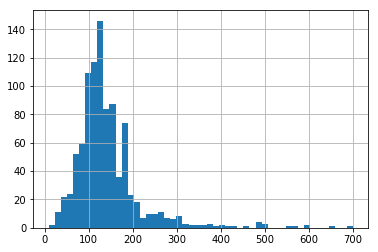

In [17]:
data.LoanAmount.hist(bins=50)

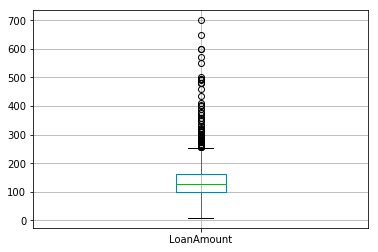

In [18]:
data.boxplot(column='LoanAmount')

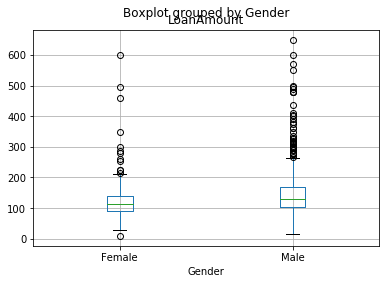

In [19]:
data.boxplot(column='LoanAmount',by='Gender')

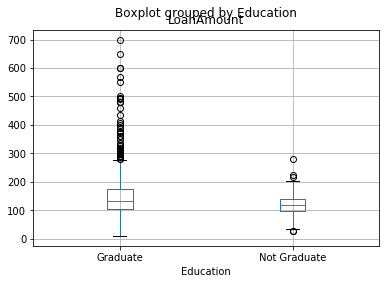

In [20]:
data.boxplot(column='LoanAmount',by='Education')

In [21]:
# categorical var univar


In [21]:
#see loan status on the basis of credit history
temp1 = data['Credit_History'].value_counts(ascending=True)
temp2 = data.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print ('Frequency Table for Credit History:')
print (temp1)

print ('\nProbility of getting loan for each Credit History class:') 
print (temp2)

Frequency Table for Credit History:
0.0    148
1.0    754
Name: Credit_History, dtype: int64

Probility of getting loan for each Credit History class:
Credit_History
0.0    0.078652
1.0    0.795789
Name: Loan_Status, dtype: float64


In [23]:
temp1=data['Credit_History'].value_counts(ascending=True)
temp1

0.0    148
1.0    754
Name: Credit_History, dtype: int64

In [25]:
#prob of getting loan for each credit history class
temp2=data.pivot_table(values='Loan_Status',index='Credit_History',aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())

In [26]:
temp2

Credit_History
0.0    0.078652
1.0    0.795789
Name: Loan_Status, dtype: float64

In [27]:
import matplotlib.pyplot as plt

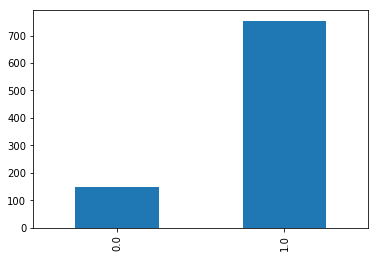

In [28]:
temp1.plot(kind='bar')

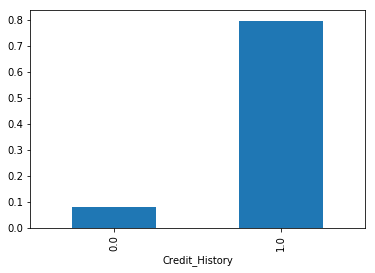

In [29]:
temp2.plot(kind='bar')

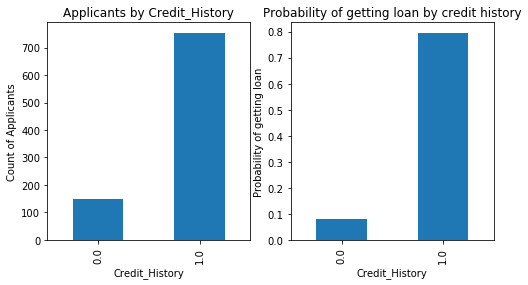

In [30]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")

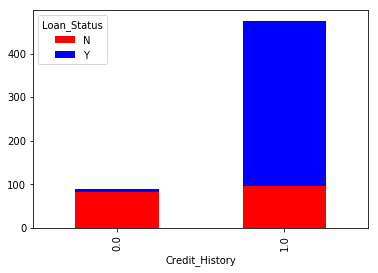

In [41]:
temp3 = pd.crosstab(data['Credit_History'], data['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)


In [32]:
data.Gender.value_counts()

Male      775
Female    182
Name: Gender, dtype: int64

In [33]:
temp4=data.pivot_table(values='Loan_Status',index='Gender',aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
temp4

Gender
Female    0.669643
Male      0.693252
Name: Loan_Status, dtype: float64

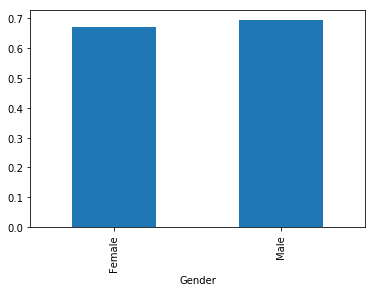

In [34]:
temp4.plot(kind='bar',stacked='yes')

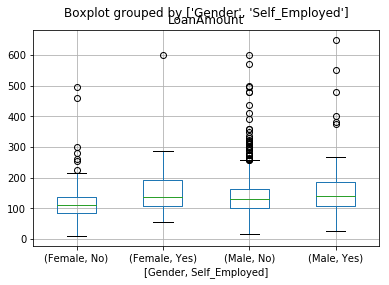

In [35]:
data.boxplot(column='LoanAmount',by=['Gender','Self_Employed'])

In [36]:
data.Self_Employed.value_counts()

No     807
Yes    119
Name: Self_Employed, dtype: int64

In [37]:
data.Self_Employed.fillna('No',inplace=True)

In [38]:
data.Self_Employed.isnull().sum()

0

In [39]:
data.Self_Employed.fillna?

In [40]:
table=data.pivot_table(values='LoanAmount',index='Self_Employed',columns='Education',aggfunc=np.median)
table

Education,Graduate,Not Graduate
Self_Employed,,
No,130.0,117.0
Yes,150.0,130.0


In [41]:
# Define function to return value of this pivot_table
def fage(x):
 return table.loc[x['Self_Employed'],x['Education']]
# Replace missing values
data['LoanAmount'].fillna(data[data['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

In [42]:
data['LoanAmount'].isnull().sum()

0

In [43]:
data['LoanAmount_log']=np.log(data.LoanAmount)

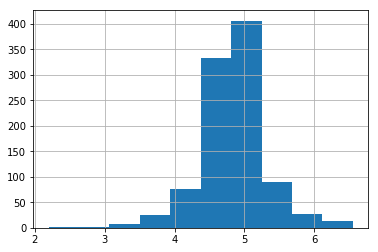

In [44]:
data['LoanAmount_log'].hist()

In [45]:
data['TotalIncome']=data['ApplicantIncome']+data['CoapplicantIncome']

In [46]:
data['TotalIncome_log']=np.log(data.TotalIncome)

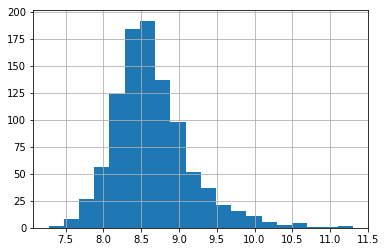

In [47]:
data['TotalIncome_log'].hist(bins=20)

In [48]:
from sklearn.preprocessing import LabelEncoder

In [49]:
le=LabelEncoder()

In [54]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']




In [53]:
data['Dependents'].isnull().sum()

25

In [137]:
y=data['Married']
def fill(y):
    if y=='Yes':
        return data['Dependents'].fillna(1,inplace=True)
    else:
        return data['Dependents'].fillna(0,inplace=True)

In [124]:
x=data['Dependents']
def fill(x):
    if x==0:
        return data['Married'].fillna('No',inplace=True)
    else:
        return data['Married'].fillna('Yes',inplace=True)


In [140]:
   v= data['Dependents'].apply(fill) 

In [141]:
 data['Dependents'].isnull().sum()

0

In [129]:
data.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed,indicator,LoanAmount_log,TotalIncome,TotalIncome_log
0,5849,0.0,1.0,0,Graduate,1,130.0,360.0,LP001002,Y,No,Urban,No,train,4.867534,5849.0,8.674026
1,4583,1508.0,1.0,1,Graduate,1,128.0,360.0,LP001003,N,Yes,Rural,No,train,4.852030,6091.0,8.714568
2,3000,0.0,1.0,0,Graduate,1,66.0,360.0,LP001005,Y,Yes,Urban,Yes,train,4.189655,3000.0,8.006368
3,2583,2358.0,1.0,0,Not Graduate,1,120.0,360.0,LP001006,Y,Yes,Urban,No,train,4.787492,4941.0,8.505323
4,6000,0.0,1.0,0,Graduate,1,141.0,360.0,LP001008,Y,No,Urban,No,train,4.948760,6000.0,8.699515


In [149]:
 from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])
data.dtypes 

ApplicantIncome        int64
CoapplicantIncome    float64
Credit_History       float64
Dependents            object
Education             object
Gender                 int64
LoanAmount           float64
Loan_Amount_Term     float64
Loan_ID               object
Loan_Status           object
Married                int64
Property_Area         object
Self_Employed         object
indicator             object
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

In [152]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [154]:
#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(data.shape[0], n_folds=5)
  error = []
  for train, test in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome]) 